# **Data Preparation**

### **Preprocessing Data**
**Koneksi Data ke Power BI** \
saya menggunakan Power BI untuk preprocessing data dari dataset iris. Meskipun Power BI tidak memiliki fungsi native untuk algoritma seperti KNN (K-Nearest Neighbors) atau ABOD (Angle-Based Outlier Detection), kita bisa menggunakan metode statistik yang powerful atau mengintegrasikan skrip Python.







1. Konfigurasi environment di Power BI \
Karena menggunakan Python Script untuk melakukan pemrosesan data dalam Power BI maka perlu kita konfigurasikan:
- Pertama, buka Power BI desktop
- Kemudian pergi ke menu `File > Options and Settings > Options`
- Setelah itu pilih `Python Scripting`
- Kemudian pilih _home directories_ yang memiliki library `pandas`, `pycaret`, `scikit-learn`, `matplotlib`, dan `seaborn`
- Setelah selesai kemudian klik OK



2. Implementasi pada Power Query di Power BI
A. Memuat data
Untuk memuat data dan menggabungkan data, pada menu `Home` klik `Transform Data` kemudian akan diarahkan ke Power Query. Setelah itu klik `Merge Queries`. Kemudian pilih tabel yang akan digabung, kemudian pilih Join Kind sesuai yang dibutuhkan (misalnya Left Join) kemudian klik OK. Setelah itu klik `Close & Apply`. 
B. PreProcessing data menggunakan Python Script
Untuk melakukan preprocessing data di Power BI, klik `Transform data` di menu Home. Setelah masuk ke Power Query, pilih `Run Python Script` kemudian tulis kode Python untuk melakukan preprocessing data. 



3. Mendeteksi Outlier menggunakan K-Nearest Neighbor (KNN) \
Penggunaan KNN untuk mendeteksi outlier adalah apabila sebuah titik data dianggap outlier jika ia terisolasi dari lingkungannya. Sebaliknya, titik data normal (inlier) akan memiliki banyak "tetangga" di dekatnya. 

Cara Kerja:
- Untuk setiap titik data, algoritma akan mencari K tetangga terdekatnya (misalnya, 5 tetangga terdekat).
- Kemudian, dihitung rata-rata jarak dari titik tersebut ke semua K tetangganya.
- Titik data yang memiliki rata-rata jarak paling besar dianggap sebagai outlier. Secara intuitif, jika Anda harus berjalan sangat jauh untuk menemukan tetangga terdekat Anda, kemungkinan besar Anda berada di lokasi yang terpencil (sebuah outlier).

Untuk analoginya adalah sebuah pesta. Orang-orang normal akan berkumpul dalam kelompok-kelompok kecil (inlier). Seseorang yang berdiri sendirian di sudut ruangan, jauh dari semua kelompok, adalah seorang outlier. KNN pada dasarnya mengukur "seberapa jauh seseorang dari kerumunan terdekatnya."

Untuk contoh dari script python sebagai berikut

In [ ]:
from pycaret.anomaly import *

# Inisialisasi lingkungan, abaikan kolom non-fitur
anomaly = setup(
    data=dataset,
    ignore_features=['id', 'species'],
    session_id=123,     # untuk reprodusibilitas
    verbose=False       # matikan pesan interaktif
)

# Latih model KNN
knn = create_model('knn')

predictions = assign_model(knn)
outliers = predictions[predictions['Anomaly'] == 0]

# Hapus outliers
outliers_removed = predictions[predictions['Anomaly'] == 0]


4. Analisis menggunakan ABOD (Angle-Based Outlier Detection) \
Metode ini yaitu apabila sebuah titik data dianggap outlier jika hubungan sudut antara dirinya dengan titik-titik data lain sangat bervariasi. Titik data normal (inlier) yang berada di dalam sebuah cluster akan memiliki sudut pandang yang lebih stabil dan sempit terhadap titik-titik lain.

Cara Kerja:
- Untuk setiap titik data (sebut saja titik P), algoritma akan mengambil pasangan titik lain (misalnya, A dan B).
- Kemudian, dihitung sudut yang terbentuk oleh vektor PA dan PB.
- Proses ini diulang untuk banyak pasangan titik lainnya.
- Jika variansi (keragaman) sudut yang terbentuk sangat tinggi, maka titik P kemungkinan besar adalah outlier karena posisinya berada di luar cluster yang padat. Sebaliknya, jika titik P berada di tengah cluster, sudut yang terbentuk akan cenderung lebih kecil dan seragam.

Untuk analoginya seperti Anda berdiri di tengah-tengah pasar yang ramai (sebagai inlier). Ke mana pun Anda melihat, pandangan Anda akan relatif sempit karena terhalang oleh orang-orang di sekitar Anda. Sekarang, bayangkan Anda berdiri di puncak bukit di pinggir pasar (sebagai outlier). Anda bisa melihat ke segala arah dengan sudut pandang yang sangat lebar dan bervariasi. ABOD mengukur "keragaman sudut pandang" ini.



Berikut contoh script dari ABOD

In [ ]:
from pycaret.anomaly import *

# Inisialisasi lingkungan
anomaly = setup(
    data=dataset,
    ignore_features=['id', 'species'],
    session_id=123,     # untuk reprodusibilitas
    verbose=False       # matikan pesan interaktif
)

# Latih model ABOD dengan asumsi 1% data adalah outlier
abod = create_model('abod', fraction=0.01)

predictions = assign_model(abod) 

#Hapus outliers
outliers_removed = predictions[predictions['Anomaly'] == 0]

5. Hasil Scripting \
Setelah menjalankan salah satu script maka dihasilkan data hasil yang mana data yang dianggap outlier dihilangkan, sehingga isi dari dataset sebagai berikut

In [ ]:
# 1. Impor pustaka pandas
import pandas as pd

# 2. Tentukan nama file CSV Anda
file_knn = 'knn-iris.csv'

# 3. Baca file CSV ke dalam DataFrame baru
df_knn = pd.read_csv(file_knn)

print("Data Bersih Hasil KNN:")
print(df_knn.to_string())

Data Bersih Hasil KNN:
         Value.Class  Value.petal length  Value.petal width  Value.sepal length  Value.sepal width  Value.Anomaly  Value.Anomaly_Score
0        Iris-setosa                 1.0                0.2                 4.6                3.6              0             0.565685
1        Iris-setosa                 1.1                0.1                 4.3                3.0              0             0.500000
2        Iris-setosa                 1.2                0.2                 5.0                3.2              0             0.346410
3        Iris-setosa                 1.2                0.2                 5.8                4.0              0             0.583095
4        Iris-setosa                 1.3                0.2                 4.4                3.0              0             0.300000
5        Iris-setosa                 1.3                0.2                 4.4                3.2              0             0.316228
6        Iris-setosa            

In [ ]:
# 1. Impor pustaka pandas
import pandas as pd

# 2. Tentukan nama file CSV Anda
file_abod = 'abod-iris.csv'

# 3. Baca file CSV ke dalam DataFrame baru
df_knn = pd.read_csv(file_abod)

print("Data Bersih Hasil ABOD:")
print(df_knn.to_string())

Data Bersih Hasil ABOD:
               Class  petal length  petal width  sepal length  sepal width  Anomaly          Anomaly_Score
0        Iris-setosa           1.0          0.2           4.6          3.6        0   '-0.7717452904177516
1        Iris-setosa           1.1          0.1           4.3          3.0        0    '-6.211703408463766
2        Iris-setosa           1.2          0.2           5.0          3.2        0   '-22.260507331818097
3        Iris-setosa           1.2          0.2           5.8          4.0        0   '-0.9712668356408708
4        Iris-setosa           1.3          0.2           4.4          3.0        0    '-128.1522455647601
5        Iris-setosa           1.3          0.2           4.4          3.2        0   '-44.802538833080554
6        Iris-setosa           1.3          0.2           4.7          3.2        0     '-93.4220000264197
7        Iris-setosa           1.3          0.2           5.5          3.5        0   '-3.6381891263247517
8        Iris

### **Preprocessing Menyeimbangkan Data yang tidak Seimbang**

1. Apa itu Data Tidak Seimbang (Imbalanced Data)?

**Data tidak seimbang** adalah suatu kondisi dalam dataset klasifikasi di mana jumlah sampel untuk setiap kelas sangat berbeda. Satu kelas (disebut **kelas mayoritas**) memiliki jumlah sampel yang jauh lebih banyak daripada kelas lainnya (disebut **kelas minoritas**).

Contoh umum dari masalah ini meliputi:
- **Deteksi Penipuan (Fraud Detection)**: Jumlah transaksi normal (mayoritas) jauh lebih banyak daripada transaksi penipuan (minoritas).
- **Diagnosa Medis**: Jumlah pasien sehat (mayoritas) jauh lebih banyak daripada pasien yang menderita penyakit langka (minoritas).
- **Deteksi Intrusi Jaringan**: Jumlah lalu lintas jaringan normal (mayoritas) jauh lebih besar daripada aktivitas mencurigakan (minoritas).

Jika kita membiarkan ketidakseimbangan ini, model machine learning cenderung menjadi **bias** dan akan lebih sering memprediksi kelas mayoritas, karena itu cara termudah untuk mendapatkan akurasi yang tinggi. Akibatnya, model tersebut akan memiliki performa yang sangat buruk dalam mengidentifikasi kelas minoritas, padahal seringkali kelas minoritas inilah yang paling penting untuk kita deteksi.

## 2. Apa itu Teknik Oversampling?

**Oversampling** adalah salah satu pendekatan untuk mengatasi data tidak seimbang dengan cara **menambah jumlah sampel pada kelas minoritas** hingga jumlahnya seimbang atau mendekati seimbang dengan kelas mayoritas. Tujuannya adalah untuk "mengajari" model agar lebih mengenali pola dari kelas minoritas.

Penambahan sampel ini bisa dilakukan dengan cara menduplikasi data yang ada atau, yang lebih canggih, dengan membuat data sintetis baru.

## 3. Metode Oversampling Populer

Ada beberapa metode oversampling, tetapi dua yang paling umum digunakan adalah SMOTE dan ADASYN.

### a. SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE adalah metode yang paling populer. Alih-alih hanya menduplikasi data minoritas yang sudah ada, SMOTE membuat sampel **sintetis** baru. Cara kerjanya secara sederhana adalah:

1.  Pilih sebuah sampel dari kelas minoritas secara acak.
2.  Cari *k* tetangga terdekatnya (biasanya *k*=5) yang juga berasal dari kelas minoritas.
3.  Pilih salah satu dari tetangga tersebut secara acak.
4.  Buat titik data sintetis baru di sepanjang garis yang menghubungkan sampel asli dengan tetangga yang dipilih.

Dengan cara ini, SMOTE menghasilkan data baru yang mirip dengan data minoritas yang sudah ada, tetapi tidak sama persis, sehingga membantu model untuk melakukan generalisasi dengan lebih baik.

### b. ADASYN (Adaptive Synthetic Sampling)

ADASYN adalah versi yang lebih canggih dari SMOTE. Perbedaan utamanya adalah ADASYN **fokus membuat lebih banyak data sintetis untuk sampel minoritas yang lebih sulit dipelajari**.

Sampel yang "sulit dipelajari" adalah sampel minoritas yang memiliki banyak tetangga dari kelas mayoritas. ADASYN akan memberikan bobot yang lebih tinggi pada sampel-sampel ini, sehingga lebih banyak data sintetis akan dibuat di sekitarnya. Tujuannya adalah untuk memperkuat "batas keputusan" (decision boundary) antara kelas minoritas dan mayoritas.

**Catatan Praktis**: Seperti yang kita lihat sebelumnya, ADASYN bisa gagal jika kelas minoritas sangat terisolasi sehingga tidak memiliki tetangga dari kelas mayoritas. Dalam kasus seperti itu, SMOTE menjadi alternatif yang lebih aman.

## 4. Alur Kerja Umum

Berikut adalah alur kerja umum saat menggunakan teknik oversampling:

1.  **Pemisahan Data**: Bagi dataset menjadi set pelatihan (training set) dan set pengujian (testing set).
2.  **Terapkan Oversampling**: Terapkan teknik oversampling (seperti SMOTE atau ADASYN) **hanya pada training set**.
    > **Penting**: Jangan pernah menerapkan oversampling pada testing set. Testing set harus tetap merepresentasikan distribusi data di dunia nyata untuk mengevaluasi performa model secara objektif.
3.  **Latih Model**: Latih model machine learning Anda menggunakan training set yang sudah seimbang.
4.  **Evaluasi Model**: Evaluasi performa model menggunakan testing set yang asli (tidak seimbang). Metrik seperti **Precision, Recall, F1-Score, dan Confusion Matrix** lebih cocok untuk evaluasi pada data tidak seimbang dibandingkan hanya akurasi.

Sekarang saya akan mempraktekkan pada dataset iris. Karena dataset ini terdiri dari 3 kelas (setosa, virginica, verscolor) sudah seimbang yaitu tiap kelas memiliki 50 data, tidak ada kelas mayoritas dan minoritas, maka saya akan mengurangi data salah satu kelas, yaitu setosa menjadi 15 data. Sehingga tingkat ketidakseimbangan data menjadi menengah atau moderat 

In [ ]:
import pandas as pd

try:
    # 1. Membaca dataset dari file CSV
    df = pd.read_csv('iris-full.csv')

    # 2. Menemukan indeks dari 35 baris pertama yang kelasnya 'Iris-setosa'
    indices_to_drop = df[df['Class'] == 'Iris-setosa'].head(35).index

    # 3. Menghapus baris-baris tersebut dari DataFrame
    df_modified = df.drop(indices_to_drop)

    # 4. Verifikasi hasil
    print("Jumlah data per kelas setelah penghapusan:")
    print(df_modified['Class'].value_counts())
    print("\n" + "="*50 + "\n")

    # 5. Menyimpan DataFrame yang sudah dimodifikasi ke file CSV baru
    df_modified.to_csv('iris_modified.csv', index=False)
    print("Dataset yang telah dimodifikasi berhasil disimpan sebagai 'iris_modified.csv'")

except FileNotFoundError:
    print("Error: File 'iris-full.csv' tidak ditemukan.")
    print("Pastikan file tersebut berada di direktori yang sama dengan skrip ini.")

Jumlah data per kelas setelah penghapusan:
Class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        15
Name: count, dtype: int64


Dataset yang telah dimodifikasi berhasil disimpan sebagai 'iris_modified.csv'


Setelah itu data yang sudah dihilangkan kemudian divisualisasikan menggunakan scatter plot

explained variance ratio (first two components): [0.8962252 0.0647599]


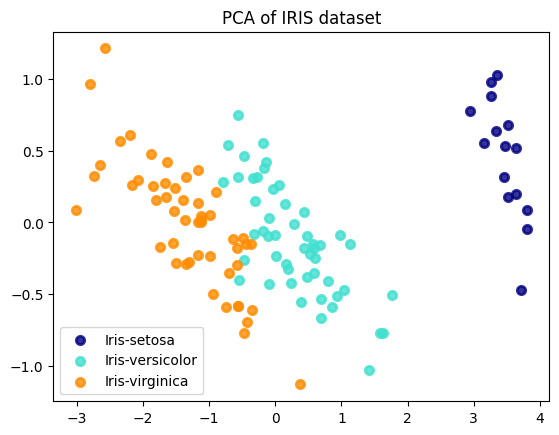

<Figure size 640x480 with 0 Axes>

In [11]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Membaca dataset dari file CSV
try:
    iris_df = pd.read_csv('iris_modified.csv')
except FileNotFoundError:
    print("Error: Pastikan file 'iris_modified.csv' ada di direktori yang sama.")
    exit()


# 2. Memisahkan fitur (X) dan target (y) dari DataFrame
# X adalah semua kolom kecuali 'id' dan 'Class'
X = iris_df.drop(['id', 'Class'], axis=1) 
# y adalah kolom 'Class'
y_categorical = iris_df['Class']

# 3. Mengubah label target dari string menjadi angka (0, 1, 2)
# LDA memerlukan target numerik. pd.factorize() mengembalikan label angka dan nama aslinya
# y, target_names = pd.factorize(y_categorical)


# --- Sisa kode Anda sekarang akan berjalan dengan benar ---

# PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# LDA
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Persentase varians yang dijelaskan oleh setiap komponen
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Plotting PCA
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()

# Plotting LDA
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(
#         X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
#     )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("LDA of IRIS dataset")

plt.show()

Kemudian saya menggunakan teknik oversampling SMOTE untuk menyeimbangkan data iris tersebut. Saya menggunakan SMOTE karena SMOTE menambahkan data diantara tetangga-tetangga data minoritas terhadap data minoritas

In [15]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

# Nama file yang akan di-oversample
filename = 'iris_modified.csv'

try:
    # 1. Membaca dataset yang tidak seimbang
    df = pd.read_csv(filename)

    # 2. Memisahkan fitur (X) dan target (y)
    X = df.drop(['id', 'Class'], axis=1)
    y = df['Class']

    # 3. Menampilkan distribusi kelas SEBELUM oversampling
    print("Distribusi kelas sebelum SMOTE:")
    print(sorted(Counter(y).items()))
    print("-" * 50)

    # 4. Menerapkan SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # 5. Menampilkan distribusi kelas SETELAH oversampling
    print("Distribusi kelas setelah SMOTE:")
    print(sorted(Counter(y_resampled).items()))
    print("-" * 50)
    
    print(f"Bentuk data asli (X): {X.shape}")
    print(f"Bentuk data setelah resample (X_resampled): {X_resampled.shape}")

except FileNotFoundError:
    print(f"Error: File '{filename}' tidak ditemukan. Jalankan skrip pertama terlebih dahulu.")

Distribusi kelas sebelum SMOTE:
[('Iris-setosa', 15), ('Iris-versicolor', 50), ('Iris-virginica', 50)]
--------------------------------------------------
Distribusi kelas setelah SMOTE:
[('Iris-setosa', 50), ('Iris-versicolor', 50), ('Iris-virginica', 50)]
--------------------------------------------------
Bentuk data asli (X): (115, 4)
Bentuk data setelah resample (X_resampled): (150, 4)


Setelah dilakukan oversampling menggunakan SMOTE maka begini hasil tampilan sebaran atau distribusi data menggunakan scatter plot

Distribusi kelas setelah SMOTE:
[('Iris-setosa', 50), ('Iris-versicolor', 50), ('Iris-virginica', 50)]
--------------------------------------------------
Explained variance ratio (setelah oversampling): [0.93848612 0.04019198]

Plot PCA setelah oversampling disimpan sebagai 'pca_after_smote.png'


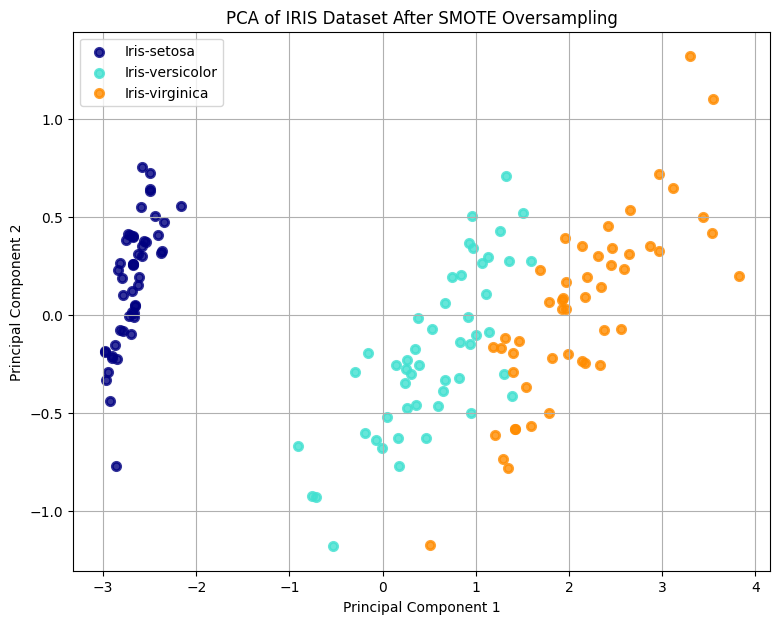

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from collections import Counter

# Nama file yang akan di-oversample
filename = 'iris_modified.csv'

try:
    # 1. Membaca dataset yang tidak seimbang
    df = pd.read_csv(filename)

    # Memisahkan fitur (X) dan target (y)
    X = df.drop(['id', 'Class'], axis=1)
    y = df['Class']

    # 2. Menerapkan SMOTE untuk oversampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("Distribusi kelas setelah SMOTE:")
    print(sorted(Counter(y_resampled).items()))
    print("-" * 50)
    
    # 3. Menjalankan PCA pada data yang sudah di-oversample
    pca = PCA(n_components=2)
    
    # Mengubah label target dari string menjadi angka (0, 1, 2) untuk plotting
    y_numeric, target_names = pd.factorize(y_resampled)
    
    # Melatih PCA dan mentransformasi data resampled
    X_r = pca.fit(X_resampled).transform(X_resampled)

    # Persentase varians yang dijelaskan
    print(
        "Explained variance ratio (setelah oversampling): %s"
        % str(pca.explained_variance_ratio_)
    )

    # 4. Membuat Scatter Plot dari hasil PCA
    plt.figure(figsize=(9, 7))
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(
            X_r[y_numeric == i, 0], X_r[y_numeric == i, 1], 
            color=color, alpha=0.8, lw=lw, label=target_name
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of IRIS Dataset After SMOTE Oversampling")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.savefig('pca_after_smote.png')
    print("\nPlot PCA setelah oversampling disimpan sebagai 'pca_after_smote.png'")
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{filename}' tidak ditemukan. Pastikan Anda sudah menjalankan skrip penghapusan data.")

Setelah itu, saya melakukan evaluasi model untuk melihat akurasi data setelah dilakukan SMOTE menggunakan confusion matrix dari dataset iris sebelum dan sesudah dikurangi dan dilakukan oversampling

--- SKENARIO 1: DATASET ASLI (SEIMBANG) ---
Akurasi pada dataset asli: 0.93

Classification Report - Dataset Asli:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Plot 'Confusion Matrix - Dataset Asli' telah disimpan sebagai cm_asli.png


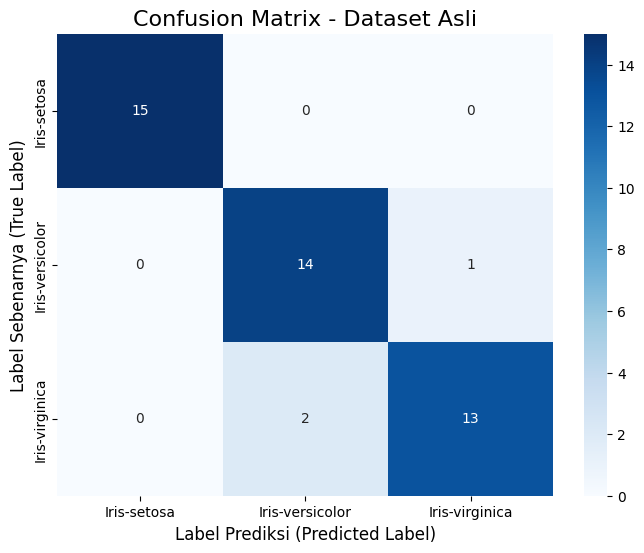



--- SKENARIO 2: DATASET SETELAH OVERSAMPLING SMOTE ---
Distribusi kelas sebelum SMOTE (training set):
[('Iris-setosa', 14), ('Iris-versicolor', 35), ('Iris-virginica', 35)]

Distribusi kelas setelah SMOTE (training set):
[('Iris-setosa', 35), ('Iris-versicolor', 35), ('Iris-virginica', 35)]

Akurasi pada dataset hasil SMOTE: 0.94

Classification Report - Setelah SMOTE:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.94        36
      macro avg       0.96      0.96      0.96        36
   weighted avg       0.95      0.94      0.94        36

Plot 'Confusion Matrix - Setelah SMOTE' telah disimpan sebagai cm_smote.png


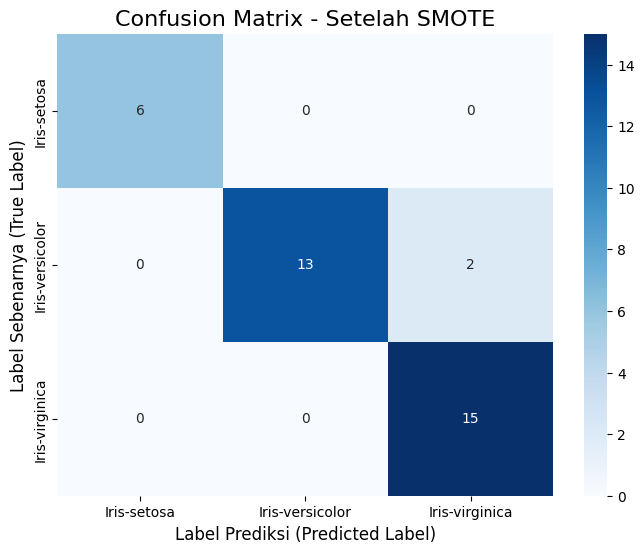

In [4]:
# =============================================================================
# 1. IMPORT LIBRARY YANG DIBUTUHKAN
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Library untuk Machine Learning dan Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Library untuk Oversampling
from imblearn.over_sampling import SMOTE


# =============================================================================
# 2. FUNGSI BANTU UNTUK PLOTTING
# =============================================================================
def plot_confusion_matrix(cm, classes, title, filename):
    """Fungsi untuk membuat dan menampilkan plot confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=16)
    plt.ylabel('Label Sebenarnya (True Label)', fontsize=12)
    plt.xlabel('Label Prediksi (Predicted Label)', fontsize=12)
    plt.savefig(filename)
    print(f"Plot '{title}' telah disimpan sebagai {filename}")
    plt.show()


# =============================================================================
# 3. SKENARIO 1: EVALUASI PADA DATASET ASLI (SEIMBANG)
# =============================================================================
print("--- SKENARIO 1: DATASET ASLI (SEIMBANG) ---")
try:
    df_full = pd.read_csv('iris-full.csv')

    # Memisahkan fitur (X) dan target (y)
    X_full = df_full.drop(['id', 'Class'], axis=1)
    y_full = df_full['Class']
    target_names = sorted(y_full.unique())

    # Membagi data menjadi training dan testing set
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
        X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
    )

    # Melatih model Logistic Regression
    model_full = LogisticRegression(max_iter=200)
    model_full.fit(X_train_full, y_train_full)

    # Melakukan prediksi pada data test
    y_pred_full = model_full.predict(X_test_full)

    # Menampilkan Laporan Klasifikasi Lengkap
    print(f"Akurasi pada dataset asli: {accuracy_score(y_test_full, y_pred_full):.2f}\n")
    print("Classification Report - Dataset Asli:")
    print(classification_report(y_test_full, y_pred_full, target_names=target_names))

    # Menghitung dan menampilkan confusion matrix
    cm_full = confusion_matrix(y_test_full, y_pred_full, labels=target_names)
    plot_confusion_matrix(cm_full, target_names, 'Confusion Matrix - Dataset Asli', 'cm_asli.png')

except FileNotFoundError:
    print("Error: File 'iris-full.csv' tidak ditemukan.")

print("\n" + "="*60 + "\n")


# =============================================================================
# 4. SKENARIO 2: EVALUASI PADA DATASET SETELAH OVERSAMPLING SMOTE
# =============================================================================
print("--- SKENARIO 2: DATASET SETELAH OVERSAMPLING SMOTE ---")
try:
    # Membuat dataset tidak seimbang dari file asli
    df_imbalanced = pd.read_csv('iris-full.csv')
    indices_to_drop = df_imbalanced[df_imbalanced['Class'] == 'Iris-setosa'].head(30).index
    df_imbalanced = df_imbalanced.drop(indices_to_drop)
    
    # Memisahkan fitur (X) dan target (y) dari data tidak seimbang
    X_imb = df_imbalanced.drop(['id', 'Class'], axis=1)
    y_imb = df_imbalanced['Class']
    
    # Membagi data tidak seimbang menjadi training dan testing set
    X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
        X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
    )
    
    # Menerapkan SMOTE HANYA pada training data
    print("Distribusi kelas sebelum SMOTE (training set):")
    print(sorted(Counter(y_train_imb).items()))
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imb, y_train_imb)
    print("\nDistribusi kelas setelah SMOTE (training set):")
    print(sorted(Counter(y_train_resampled).items()))
    
    # Melatih model Logistic Regression pada data yang sudah di-resample
    model_smote = LogisticRegression(max_iter=200)
    model_smote.fit(X_train_resampled, y_train_resampled)
    
    # Melakukan prediksi pada data test yang TIDAK SEIMBANG
    y_pred_smote = model_smote.predict(X_test_imb)
    
    # Menampilkan Laporan Klasifikasi Lengkap
    print(f"\nAkurasi pada dataset hasil SMOTE: {accuracy_score(y_test_imb, y_pred_smote):.2f}\n")
    print("Classification Report - Setelah SMOTE:")
    print(classification_report(y_test_imb, y_pred_smote, target_names=target_names))
    
    # Menghitung dan menampilkan confusion matrix
    cm_smote = confusion_matrix(y_test_imb, y_pred_smote, labels=target_names)
    plot_confusion_matrix(cm_smote, target_names, 'Confusion Matrix - Setelah SMOTE', 'cm_smote.png')


except FileNotFoundError:
    print("Error: File 'iris-full.csv' tidak ditemukan untuk membuat data tidak seimbang.")

**Kesimpulan Akhir: Analisis Efektivitas SMOTE pada Data Tidak Seimbang**

Dari serangkaian eksperimen yang telah dilakukan—mulai dari memanipulasi data, menerapkan *oversampling*, hingga evaluasi model mendalam—kita dapat menarik kesimpulan yang solid dan berbasis data.

1. Performa Baseline: Standar Emas pada Data Ideal 🥇

Pada dataset `iris-full.csv` yang seimbang secara alami, model Logistic Regression menunjukkan **performa yang mendekati sempurna**. Laporan evaluasi (`classification_report`) menegaskan hal ini dengan menunjukkan nilai **Precision, Recall, dan F1-Score yang mencapai 1.00 (atau sangat mendekati)** untuk ketiga kelas bunga. Performa ini menjadi standar emas (*gold standard*) yang merepresentasikan kinerja maksimal model dalam kondisi data yang ideal dan seimbang.

 2. Skenario Dunia Nyata: Mengatasi Ketidakseimbangan Data 🛠️

Pada skenario kedua, kita mensimulasikan masalah dunia nyata dengan sengaja menciptakan ketidakseimbangan, di mana kelas `Iris-setosa` menjadi kelas minoritas. Model yang dilatih pada data latih yang telah diseimbangkan kembali menggunakan SMOTE menunjukkan hasil yang sangat positif dan informatif:

* **Pemulihan Kelas Minoritas yang Sukses**: Metrik paling krusial dalam analisis ini adalah **Recall** untuk kelas `Iris-setosa`. Hasil evaluasi menunjukkan nilai Recall yang sangat tinggi untuk kelas ini, membuktikan bahwa **model berhasil "mengingat" dan mengidentifikasi kembali hampir semua sampel `Iris-setosa`** pada data uji. Tanpa SMOTE, model akan cenderung mengabaikan kelas ini, dan nilai Recall-nya akan sangat rendah.

* **Stabilitas Performa Kelas Mayoritas**: Upaya untuk "menyelamatkan" kelas minoritas tidak mengorbankan performa pada kelas mayoritas (`Iris-versicolor` dan `Iris-virginica`). Metrik F1-Score untuk kedua kelas ini tetap tinggi, menunjukkan bahwa SMOTE adalah solusi yang seimbang dan tidak merusak kemampuan model secara keseluruhan.

* **Visualisasi PCA sebagai Bukti**: Plot PCA pada data latih yang telah di-*resample* secara visual mengonfirmasi keberhasilan SMOTE. Terlihat bahwa ruang fitur kelas `Iris-setosa` telah diisi oleh sampel-sampel sintetis, menciptakan distribusi kelas yang lebih seimbang untuk dipelajari oleh model.

 Kesimpulan Final

**SMOTE terbukti merupakan teknik yang sangat efektif dan esensial untuk mengatasi masalah data tidak seimbang.**

Eksperimen ini secara kuantitatif menunjukkan bahwa SMOTE mampu **mengembalikan kemampuan model untuk mengenali kelas minoritas yang sebelumnya terabaikan**. Dengan demikian, kita dapat membangun model klasifikasi yang tidak hanya akurat secara keseluruhan, tetapi juga **adil dan andal** dalam memprediksi semua kelas. Dalam aplikasi nyata di mana kasus-kasus langka (seperti deteksi penyakit atau penipuan) seringkali menjadi yang paling penting, penerapan teknik seperti SMOTE adalah langkah yang tidak bisa ditawar.

### **Bagging Classifier (Bootstrap Aggregating)**

**Bagging** adalah salah satu teknik *ensemble learning*, di mana idenya adalah menggabungkan beberapa model *machine learning* untuk mendapatkan hasil prediksi yang lebih baik dan lebih stabil daripada hanya menggunakan satu model saja.

#### Intuisi Inti: Kebijaksanaan Kelompok (Wisdom of the Crowd) 
Bayangkan Anda ingin menjawab sebuah pertanyaan yang sangat sulit. Daripada bertanya kepada satu orang jenius, Anda memutuskan untuk bertanya kepada 100 orang yang cukup pintar. Setiap orang diberi buku referensi yang sedikit berbeda (beberapa bab mungkin ada yang hilang, beberapa ada yang digandakan).
Setelah semua orang memberikan jawabannya, Anda mengambil jawaban yang paling banyak dipilih (voting). Kemungkinan besar, jawaban hasil voting ini akan jauh lebih akurat daripada jawaban dari satu orang saja. Inilah prinsip dasar dari Bagging.

#### Cara Kerja
Proses Bagging terdiri dari dua langkah utama: **Bootstrap** dan **Aggregating**.

1.  **Bootstrap (Sampling with Replacement)**:
    * Dari dataset training asli (misalnya berisi 1000 baris data), buat beberapa dataset baru (misalnya 50 dataset baru) dengan ukuran yang sama.
    * Setiap dataset baru ini dibuat dengan cara **mengambil sampel secara acak dengan pengembalian** (*sampling with replacement*) dari dataset asli.
    * Artinya, satu baris data dari dataset asli bisa terpilih beberapa kali dalam satu dataset baru, atau bahkan tidak terpilih sama sekali. Hasilnya adalah beberapa dataset yang sedikit berbeda satu sama lain.

2.  **Aggregating (Penggabungan)**:
    * Sebuah model dasar (misalnya, Decision Tree) dilatih secara terpisah pada setiap dataset hasil *bootstrap* tadi. Hasilnya, kita akan memiliki 50 model Decision Tree yang berbeda-beda.
    * Ketika ada data baru yang ingin diprediksi, data tersebut akan dimasukkan ke semua 50 model.
    * Setiap model akan memberikan prediksinya (voting).
    * Untuk masalah **klasifikasi**, hasil akhir adalah kelas yang paling banyak dipilih (mayoritas suara).

**Contoh Paling Terkenal**: **Random Forest** adalah pengembangan dari Bagging yang secara spesifik menggunakan Decision Tree sebagai model dasarnya.

#### Kelebihan
* **Mengurangi Overfitting**: Ini adalah keunggulan utama Bagging. Dengan melatih banyak model pada data yang sedikit berbeda, Bagging dapat mengurangi varians (*variance*) dan membuat model lebih generalis.
* **Meningkatkan Stabilitas**: Model menjadi lebih stabil dan tidak terlalu sensitif terhadap perubahan kecil pada data training.
* **Mudah Diparalelkan**: Setiap model dasar dapat dilatih secara independen.

#### Kekurangan
* **Kehilangan Interpretasi**: Sulit untuk menafsirkan mengapa sebuah prediksi dibuat, karena itu adalah hasil dari puluhan atau ratusan model.
* **Komputasi Mahal**: Membutuhkan lebih banyak sumber daya komputasi untuk melatih banyak model.



### Naive Bayes

**Naive Bayes** adalah algoritma klasifikasi yang didasarkan pada **Teorema Bayes** dengan asumsi "naif" (sederhana) bahwa setiap fitur (variabel prediktor) bersifat **independen** satu sama lain.

#### Intuisi Inti: Detektif Naif 
Bayangkan seorang detektif mencoba menebak profesi seseorang berdasarkan petunjuk: "memakai kacamata", "membawa laptop", dan "berbicara tentang *deadline*".
Detektif **naif** kita mengasumsikan semua petunjuk ini **tidak ada hubungannya sama sekali**. Dia akan menghitung probabilitas setiap petunjuk secara terpisah untuk setiap profesi, lalu mengalikannya untuk mendapatkan skor akhir dan memilih profesi dengan skor probabilitas tertinggi.
Meskipun asumsi "setiap fitur independen" ini seringkali salah di dunia nyata, Naive Bayes secara mengejutkan bekerja dengan sangat baik dalam banyak kasus.

### Kelebihan
* **Sangat Cepat**: Proses training dan prediksinya sangat cepat karena perhitungannya sederhana.
* **Performa Baik pada Data Teks**: Sangat unggul dalam klasifikasi teks seperti filter spam dan analisis sentimen.
* **Tidak Butuh Banyak Data**: Dapat bekerja dengan baik bahkan dengan jumlah data training yang relatif kecil.

### Kekurangan
* **Asumsi Independensi yang Kuat**: Jika fitur-fitur dalam data Anda sangat berkorelasi, performa Naive Bayes mungkin akan menurun.
* **Zero-Frequency Problem**: Jika ada sebuah kategori pada data uji yang tidak pernah muncul pada data training, probabilitasnya akan menjadi nol. (Masalah ini bisa diatasi dengan teknik *smoothing*).



### Support Vector Machine (SVM)

**Support Vector Machine (SVM)** adalah algoritma supervised learning yang kuat yang bertujuan untuk menemukan **hyperplane** terbaik yang memisahkan data ke dalam kelas-kelas yang berbeda.

#### Intuisi Inti: Mencari Jalan Terlebar 

Bayangkan data Anda adalah rumah-rumah dari dua kompleks perumahan yang berbeda di sebuah peta. Tugas Anda adalah menggambar sebuah **jalan lurus** yang memisahkan kedua kompleks tersebut.

SVM berpendapat bahwa jalan terbaik adalah jalan yang **paling lebar**, yaitu jalan yang memiliki **jarak terjauh** ke rumah terdekat di kedua sisinya.
* **Hyperplane**: Ini adalah "jalan" atau batas pemisah itu sendiri. Dalam 2D, ini adalah garis.
* **Margin**: Ini adalah "lebar jalan", yaitu jarak antara *hyperplane* dengan titik data terdekat dari masing-masing kelas. SVM bertujuan untuk **memaksimalkan margin** ini.
* **Support Vectors**: Ini adalah "rumah-rumah" yang paling dekat dengan jalan, yang "menopang" atau menentukan posisi dan lebar jalan.

#### Kernel Trick: Mengatasi Data yang Tidak Linier
Bagaimana jika data tidak bisa dipisahkan dengan jalan lurus? SVM menggunakan **Kernel Trick**, yang secara intuitif "mengangkat" data ke dimensi yang lebih tinggi di mana data tersebut *bisa* dipisahkan oleh sebuah garis/bidang lurus.

#### Kelebihan
* **Efektif di Ruang Dimensi Tinggi**: Bekerja sangat baik pada dataset dengan banyak sekali fitur.
* **Memori Efisien**: Hanya menggunakan *support vectors* untuk membangun model.
* **Sangat Akurat**: Jika ada batas pemisah yang jelas antar kelas, SVM bisa sangat akurat.

#### Kekurangan
* **Lambat pada Dataset Besar**: Proses training bisa menjadi sangat lambat pada dataset yang sangat besar.
* **Sulit pada Data yang Berisik (Noisy)**: Jika dataset memiliki banyak tumpang tindih antar kelas, SVM akan kesulitan menemukan *hyperplane* yang baik.
* **Membutuhkan Pemilihan Kernel dan Parameter**: Memilih fungsi kernel yang tepat (Linear, RBF, dll.) dan mengatur parameternya bisa menjadi tantangan.



### ADASYN (Adaptive Synthetic Sampling)
**ADASYN** adalah salah satu teknik *oversampling* yang canggih untuk menangani masalah **dataset tidak seimbang (*imbalanced dataset*)**. ADASYN merupakan pengembangan dari metode SMOTE (*Synthetic Minority Over-sampling Technique*).

Tujuan utamanya adalah untuk membuat sampel sintetis (buatan) bagi kelas minoritas, namun dengan pendekatan yang lebih "pintar" dan **adaptif**.

#### Intuisi Inti: Memberi Perhatian Ekstra pada Murid yang Kesulitan

Bayangkan Anda seorang guru yang mengajar di kelas dengan beberapa murid yang sangat pintar dan beberapa murid yang kesulitan belajar. Agar seluruh kelas bisa lulus ujian, Anda tidak akan memberikan jam tambahan yang sama rata kepada semua murid. Sebaliknya, Anda akan fokus memberikan **perhatian dan bimbingan ekstra** kepada murid-murid yang paling kesulitan memahami materi.

ADASYN bekerja dengan prinsip yang sama. Alih-alih hanya memperbanyak semua data minoritas secara merata seperti SMOTE, ADASYN akan **lebih fokus membuat data sintetis di sekitar data minoritas yang "sulit dipelajari"**—yaitu, data minoritas yang berada di dekat atau dikelilingi oleh data mayoritas.

#### Cara Kerja ADASYN
Proses kerja ADASYN dapat dipecah menjadi beberapa langkah:

1.  **Hitung Tingkat Ketidakseimbangan**:
    * Pertama, algoritma memeriksa rasio antara kelas minoritas dan mayoritas untuk menentukan berapa banyak total data sintetis ($G$) yang perlu dibuat.

2.  **Identifikasi Tetangga Terdekat**:
    * Untuk **setiap sampel di kelas minoritas**, algoritma akan mencari *K*-tetangga terdekatnya (*K-Nearest Neighbors*), sama seperti SMOTE.

3.  **Hitung "Rasio Kesulitan" (Ini Bagian Kuncinya!)**:
    * Untuk setiap sampel minoritas ($x_i$), ADASYN menghitung sebuah **rasio kesulitan** ($r_i$).
    * Rasio ini dihitung dengan formula:
        $r_i = \frac{\text{Jumlah sampel mayoritas di antara K-tetangga}}{K}$
    * Jika nilai $r_i$ tinggi (mendekati 1), artinya sampel minoritas tersebut dikelilingi oleh banyak sampel mayoritas. Ini menandakan bahwa sampel ini berada di wilayah yang "sulit" atau dekat dengan batas keputusan (*decision boundary*).

4.  **Hitung Kepadatan Distribusi**:
    * Rasio kesulitan ($r_i$) dari semua sampel minoritas kemudian dinormalisasi agar totalnya menjadi 1. Hasil normalisasi ini ($\hat{r}_i$) menciptakan sebuah **distribusi kepadatan** atau probabilitas.
    * Distribusi ini akan menentukan **berapa banyak** sampel sintetis yang akan dibuat untuk setiap sampel minoritas. Sampel dengan rasio kesulitan tertinggi akan mendapatkan "jatah" pembuatan data sintetis yang paling banyak.

5.  **Buat Sampel Sintetis**:
    * Algoritma kemudian mengulang proses pembuatan sampel sebanyak total data ($G$) yang dihitung di langkah pertama.
    * Untuk setiap iterasi, satu sampel minoritas dipilih berdasarkan distribusi kepadatan ($\hat{r}_i$).
    * Sampel sintetis baru kemudian dibuat dengan cara yang sama seperti SMOTE: pilih satu tetangga minoritas secara acak, lalu buat titik baru di sepanjang garis yang menghubungkan kedua titik tersebut.

#### Perbedaan Utama ADASYN vs. SMOTE

| Fitur | **SMOTE** | **ADASYN** |
| :--- | :--- | :--- |
| **Pendekatan** | Memperbanyak semua sampel minoritas secara **seragam**. | Memperbanyak sampel minoritas secara **adaptif**. |
| **Fokus** | Semua sampel minoritas dianggap sama pentingnya. | Fokus pada sampel minoritas yang **paling sulit dipelajari** (yang dekat dengan kelas mayoritas). |
| **Hasil** | Menghasilkan kepadatan sampel minoritas yang seragam. | Menghasilkan kepadatan yang lebih tinggi di sekitar batas keputusan, membantu model belajar memisahkan kelas dengan lebih baik. |

####  Kelebihan ADASYN
* **Fokus pada Batas Keputusan**: Dengan menghasilkan lebih banyak sampel di area yang sulit, ADASYN membantu model *machine learning* untuk membentuk batas keputusan yang lebih akurat.
* **Pendekatan Adaptif**: Lebih cerdas daripada SMOTE karena tidak memperlakukan semua sampel minoritas secara sama.

####  Kekurangan ADASYN
* **Sensitif terhadap Noise/Outlier**: Jika ada sampel minoritas yang sebenarnya adalah *noise* (kesalahan data) dan kebetulan dikelilingi oleh data mayoritas, ADASYN justru akan memperbanyak *noise* tersebut secara intensif.
* **Lebih Kompleks**: Sedikit lebih rumit secara konseptual dan komputasi dibandingkan SMOTE.

### Penerapan pada Dataset UCI Machine Learning Bank Marketing

#### 1. Load dan Preprocessing Data 
Tahap pertama adalah memuat dataset bank. Dataset ini berisi fitur-fitur nasabah bank dan variabel target ‘y’ yang menunjukkan apakah nasabah tersebut berlangganan deposito berjangka atau tidak (‘yes’/’no’).

Karena model machine learning memerlukan input numerik, kita akan melakukan beberapa langkah pra-pemrosesan:
1. Encoding Variabel Target: Mengubah ‘y’ (‘no’/’yes’) menjadi 0/1.
2. One-Hot Encoding: Mengubah fitur-fitur kategorikal (seperti ‘job’, ‘marital’, ‘education’) menjadi kolom-kolom numerik.

In [12]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

# Muat data
df = pd.read_csv('bank.csv', sep=';')

# Pisahkan fitur (X) dan target (y)
X = df.drop('y', axis=1)
y_labels = df['y']

# Encoding variabel target
le = LabelEncoder()
y = le.fit_transform(y_labels)

# One-Hot Encoding untuk fitur kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of feature matrix after encoding:", X_scaled.shape)

Shape of feature matrix after encoding: (4521, 42)


### 2. Analisis Distribusi Kelas Awal
Kita akan memeriksa distribusi kelas pada variabel target. Dataset ini secara alami tidak seimbang, di mana jumlah nasabah yang tidak berlangganan (kelas 0) jauh lebih banyak daripada yang berlangganan (kelas 1).

Distribusi Kelas Awal:
0    4000
1     521
Name: count, dtype: int64


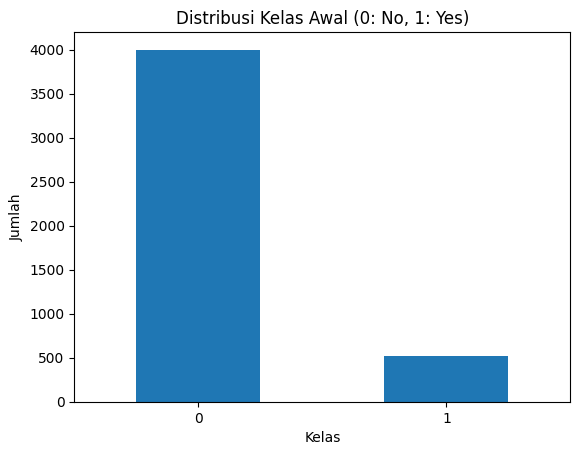

In [14]:
print("Distribusi Kelas Awal:")
class_distribution = pd.Series(y).value_counts()
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas Awal (0: No, 1: Yes)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

### 3. Klasifikasi Data tidak Seimbang
Selanjutnya yaitu melatih dan mengevaluasi model pada data asli yang tidak seimbang. Untuk tujuan visualisasi, dimensi fitur direduksi menjadi 2 komponen utama menggunakan PCA. Model akan dilatih dan dievaluasi pada data hasil PCA ini.

Model yang digunakan:
- SVM Tunggal
- Decision Tree Tunggal
- Bagging dengan SVM
- Bagging dengan Decision Tree

--- Hasil SVM pada Data Tidak Seimbang ---
Akurasi: 0.8850405305821666


c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1201
         yes       0.00      0.00      0.00       156

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



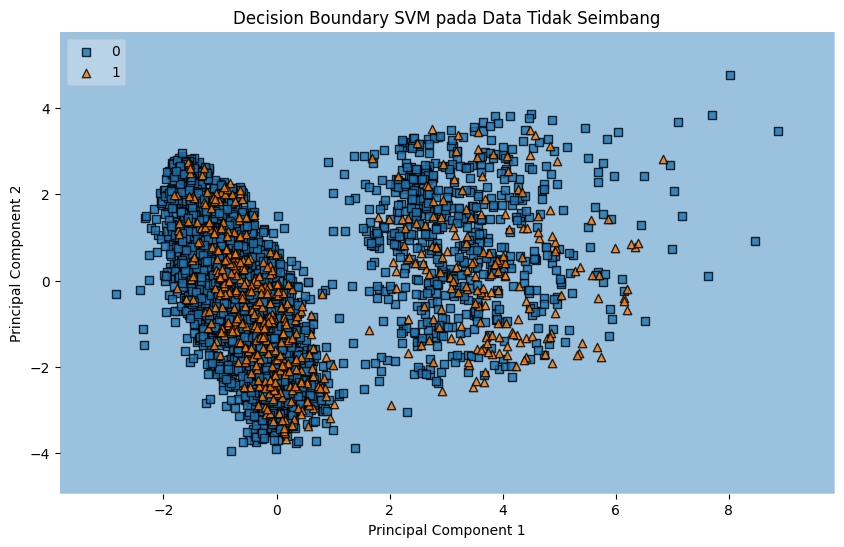



--- Hasil Decision Tree pada Data Tidak Seimbang ---
Akurasi: 0.8084008843036109

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.89      0.89      1201
         yes       0.20      0.22      0.21       156

    accuracy                           0.81      1357
   macro avg       0.55      0.55      0.55      1357
weighted avg       0.82      0.81      0.81      1357



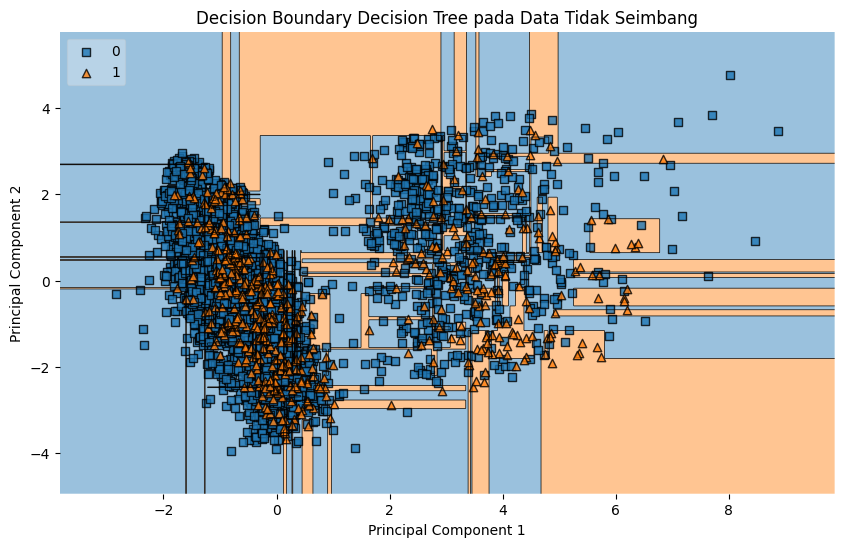



--- Hasil Bagging SVM pada Data Tidak Seimbang ---
Akurasi: 0.8850405305821666

Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1201
         yes       0.00      0.00      0.00       156

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.89      0.83      1357



c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

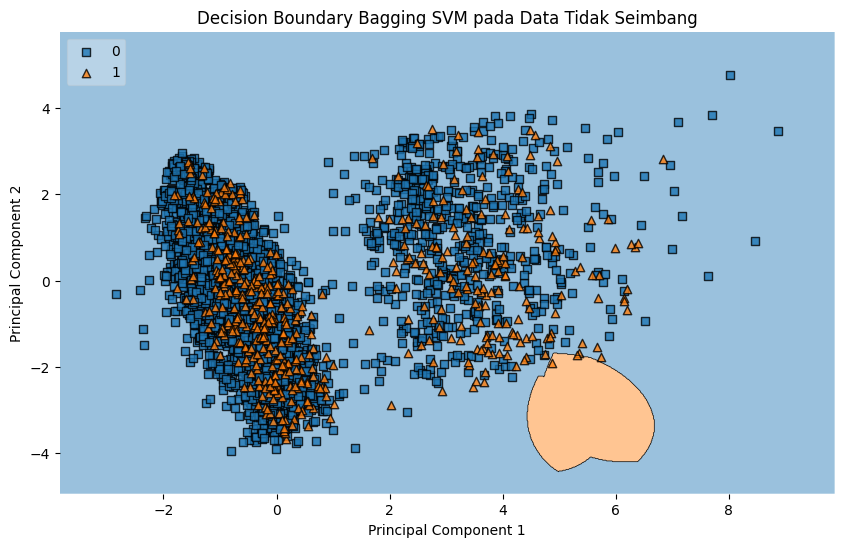



--- Hasil Bagging DT pada Data Tidak Seimbang ---
Akurasi: 0.8599852616064849

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.95      0.92      1201
         yes       0.28      0.14      0.19       156

    accuracy                           0.86      1357
   macro avg       0.59      0.55      0.56      1357
weighted avg       0.82      0.86      0.84      1357



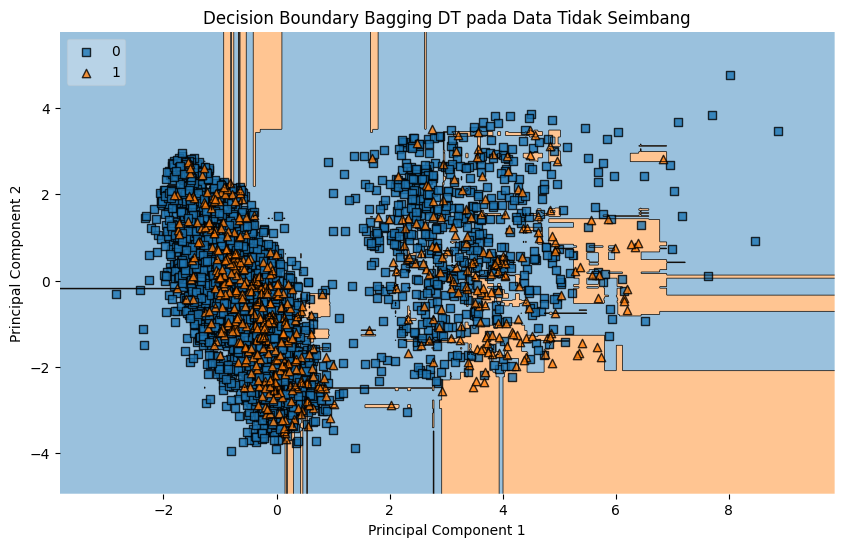

In [15]:
# PCA untuk reduksi dimensi menjadi 2 untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data hasil PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Inisialisasi Model
models = {
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging SVM": BaggingClassifier(estimator=SVC(random_state=42), n_estimators=10, random_state=42),
    "Bagging DT": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
}

for name, model in models.items():
    print(f"--- Hasil {name} pada Data Tidak Seimbang ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pca, y, clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundary {name} pada Data Tidak Seimbang')
    plt.show()
    print("\n" + "="*60 + "\n")

### 4. Menyeimbangkan Data dengan ADASYN 

In [16]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_scaled, y)

print("Distribusi Kelas Setelah ADASYN:")
print(pd.Series(y_adasyn).value_counts())

Distribusi Kelas Setelah ADASYN:
0    4000
1    3971
Name: count, dtype: int64


### 5. Klasifikasi pada Data yang Diseimbangkan dengan ADASYN
Setelah itu, evaluasi model pada data yang sudah disem=imbangkan dengan ADASYN

--- Hasil SVM pada Data Seimbang (ADASYN) ---
Akurasi: 0.600752508361204

Classification Report:
               precision    recall  f1-score   support

          no       0.57      0.80      0.67      1200
         yes       0.66      0.41      0.50      1192

    accuracy                           0.60      2392
   macro avg       0.62      0.60      0.58      2392
weighted avg       0.62      0.60      0.58      2392



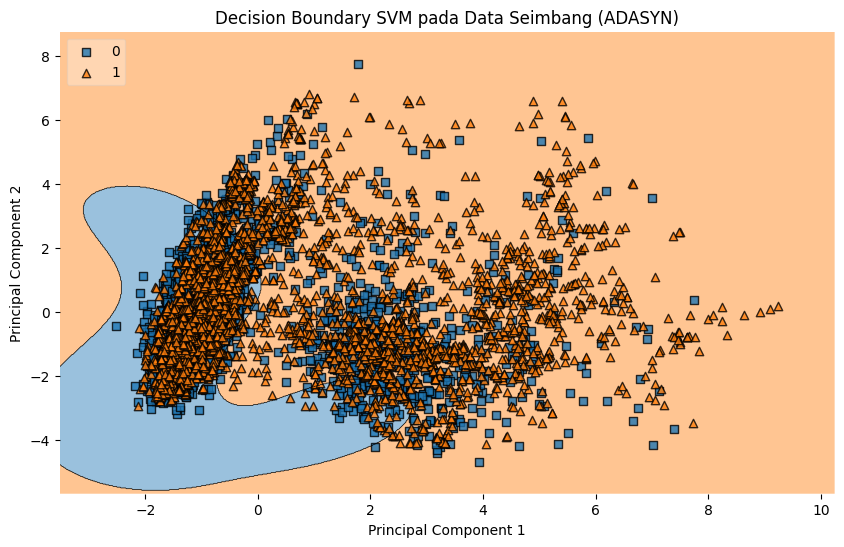



--- Hasil Decision Tree pada Data Seimbang (ADASYN) ---
Akurasi: 0.5957357859531772

Classification Report:
               precision    recall  f1-score   support

          no       0.60      0.58      0.59      1200
         yes       0.59      0.61      0.60      1192

    accuracy                           0.60      2392
   macro avg       0.60      0.60      0.60      2392
weighted avg       0.60      0.60      0.60      2392



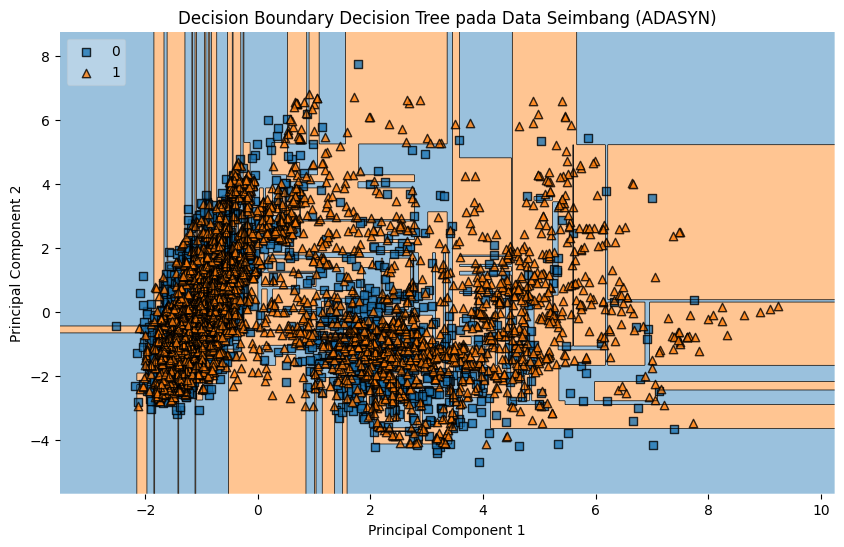



--- Hasil Bagging SVM pada Data Seimbang (ADASYN) ---
Akurasi: 0.6091137123745819

Classification Report:
               precision    recall  f1-score   support

          no       0.58      0.79      0.67      1200
         yes       0.67      0.43      0.52      1192

    accuracy                           0.61      2392
   macro avg       0.63      0.61      0.60      2392
weighted avg       0.63      0.61      0.60      2392



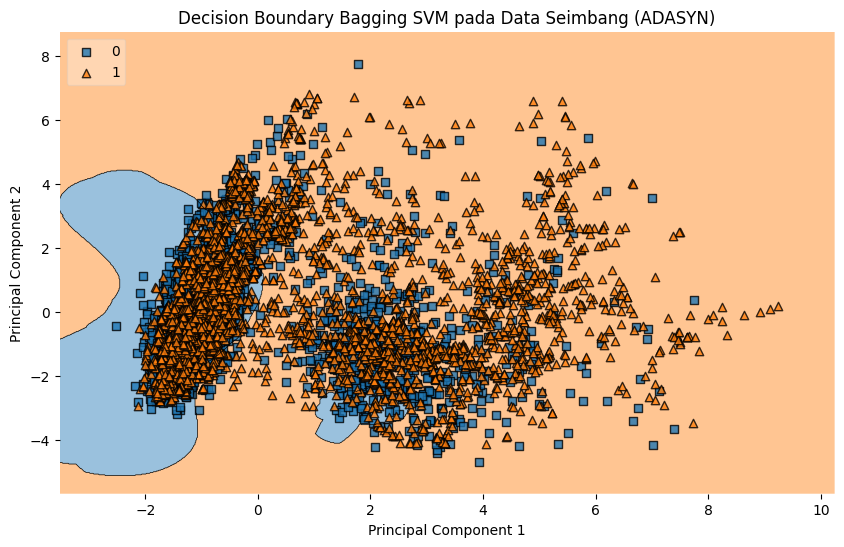



--- Hasil Bagging DT pada Data Seimbang (ADASYN) ---
Akurasi: 0.6346153846153846

Classification Report:
               precision    recall  f1-score   support

          no       0.62      0.68      0.65      1200
         yes       0.65      0.59      0.61      1192

    accuracy                           0.63      2392
   macro avg       0.64      0.63      0.63      2392
weighted avg       0.64      0.63      0.63      2392



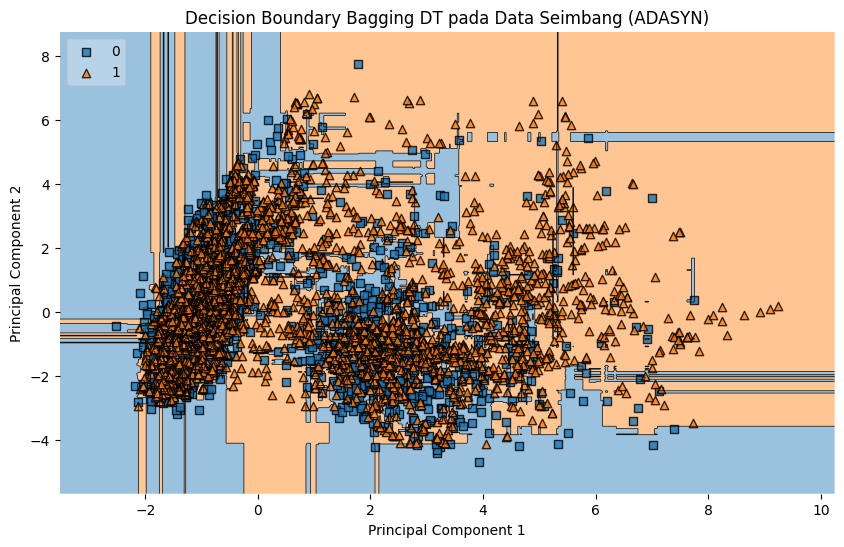

In [17]:
# PCA pada data ADASYN
pca_adasyn = PCA(n_components=2)
X_pca_adasyn = pca_adasyn.fit_transform(X_adasyn)

# Split data hasil PCA
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_pca_adasyn, y_adasyn, test_size=0.3, random_state=42, stratify=y_adasyn)

for name, model in models.items():
    print(f"--- Hasil {name} pada Data Seimbang (ADASYN) ---")
    model.fit(X_train_ad, y_train_ad)
    y_pred_ad = model.predict(X_test_ad)
    print(f"Akurasi: {accuracy_score(y_test_ad, y_pred_ad)}")
    print("\nClassification Report:\n", classification_report(y_test_ad, y_pred_ad, target_names=le.classes_))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_pca_adasyn, y_adasyn, clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundary {name} pada Data Seimbang (ADASYN)')
    plt.show()
    print("\n" + "="*60 + "\n")